In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c=pd.read_csv("Customers.csv")
p=pd.read_csv("Products.csv")
t=pd.read_csv("Transactions.csv")

print(c.head())
print(p.head())
print(t.head())



  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       


Missing Values in c Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Duplicate Rows in c Dataset:
0

Summary Statistics for c:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Number of c per Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


<ipython-input-66-25f70011629e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=c, x='Region', palette="viridis")


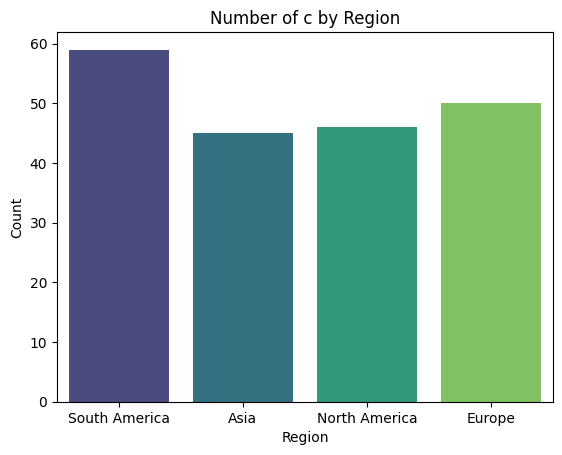


Signup Trends (Yearly):
SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64


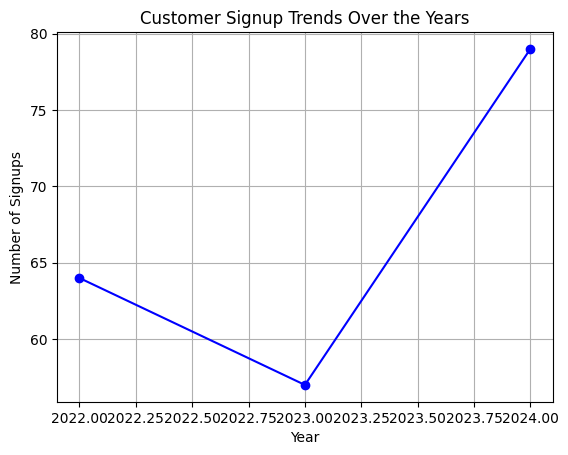

In [ ]:
print("\nMissing Values in c Dataset:")
print(c.isnull().sum())
print("\nDuplicate Rows in c Dataset:")
print(c.duplicated().sum())
print("\nSummary Statistics for c:")
print(c.describe(include="all"))
region_counts = c['Region'].value_counts()
print("\nNumber of c per Region:")
print(region_counts)

sns.countplot(data=c, x='Region', palette="viridis")
plt.title("Number of c by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

c['SignupDate'] = pd.to_datetime(c['SignupDate'])
c['SignupYear'] = c['SignupDate'].dt.year
signup_trends = c['SignupYear'].value_counts().sort_index()

print("\nSignup Trends (Yearly):")
print(signup_trends)
signup_trends.plot(kind='line', marker='o', color='blue')
plt.title("Customer Signup Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.grid(True)
plt.show()



Missing Values in p Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Duplicate Rows in p Dataset:
0

Summary Statistics for p:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          NaN                    NaN      NaN  497.760000

Number of p by Category:
Category
Books          26
Electronics    26
Clothing       25
Home Deco

<ipython-input-67-782396c8830f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=p, x='Category', palette="coolwarm")


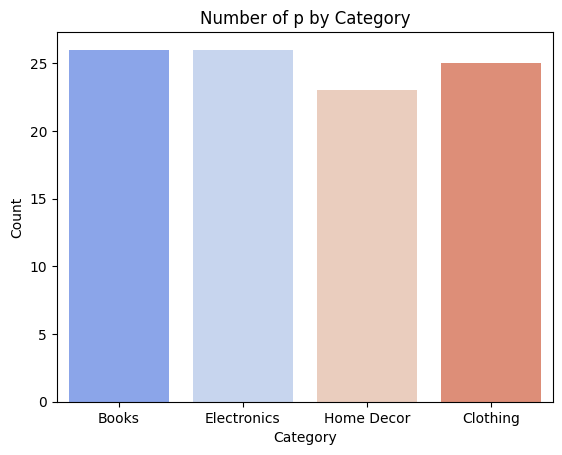


Product Price Statistics:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


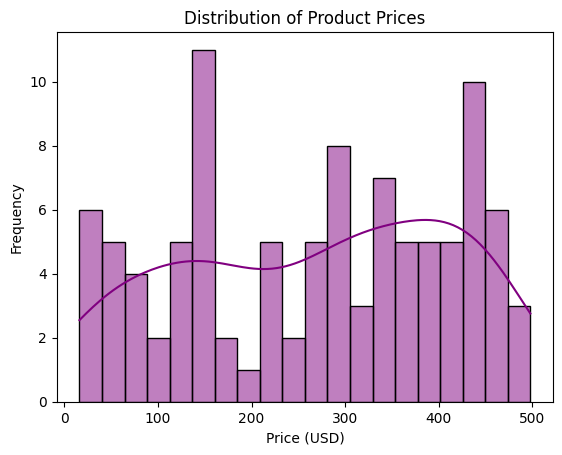


Top 5 Most Expensive p:
   ProductID           ProductName     Category   Price
74      P075      TechPro Textbook        Books  497.76
31      P032    BookWorld Cookbook        Books  488.63
44      P045     SoundWave T-Shirt     Clothing  481.78
16      P017   ActiveWear Textbook        Books  469.77
36      P037  SoundWave Smartwatch  Electronics  459.86


In [ ]:

print("\nMissing Values in p Dataset:")
print(p.isnull().sum())
print("\nDuplicate Rows in p Dataset:")
print(p.duplicated().sum())

print("\nSummary Statistics for p:")
print(p.describe(include="all"))


category_counts = p['Category'].value_counts()
print("\nNumber of p by Category:")
print(category_counts)

sns.countplot(data=p, x='Category', palette="coolwarm")
plt.title("Number of p by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
print("\nProduct Price Statistics:")
print(p['Price'].describe())
sns.histplot(p['Price'], kde=True, bins=20, color='purple')
plt.title("Distribution of Product Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()
top_expensive = p.nlargest(5, 'Price')
print("\nTop 5 Most Expensive p:")
print(top_expensive)



Missing Values in t Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate Rows in t Dataset:
0

Summary Statistics for t:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000

Total Revenue: $689995.56
Average Transaction Value: $690.00

Total Revenue by Product:
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
          ...   
P070      730.35
P073      647.76
P014      367.64
P056      337.68
P044      244.66
Name: TotalValue, Length: 100, dtype: float64


<ipython-input-68-1204de79e016>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_product.index[:10], y=revenue_by_product.values[:10], palette="plasma")


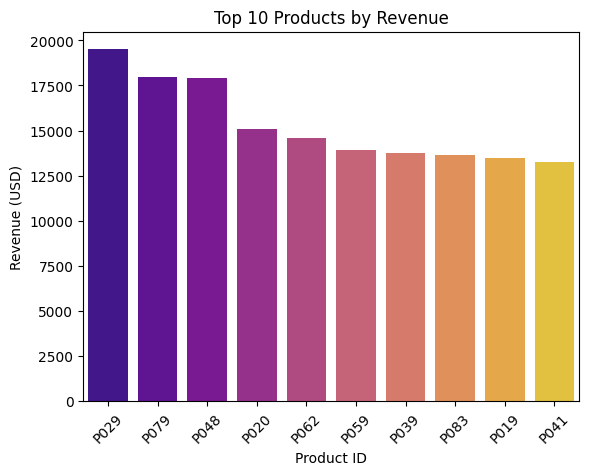


Monthly Sales Trends:
Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


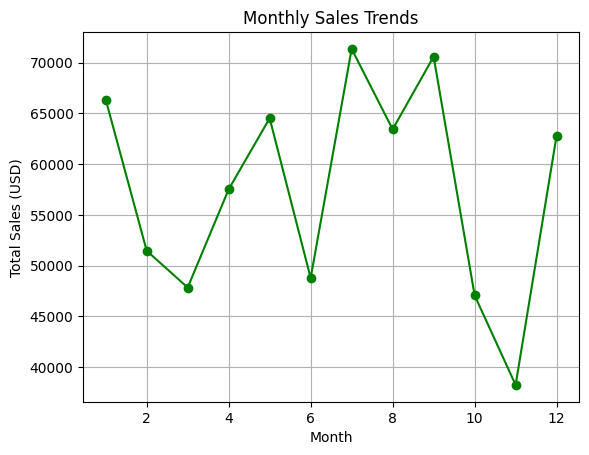


Most Purchased Products:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
        ..
P044    13
P060    13
P024    12
P099    11
P031     9
Name: Quantity, Length: 100, dtype: int64


<ipython-input-68-1204de79e016>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_purchased.index[:10], y=most_purchased.values[:10], palette="magma")


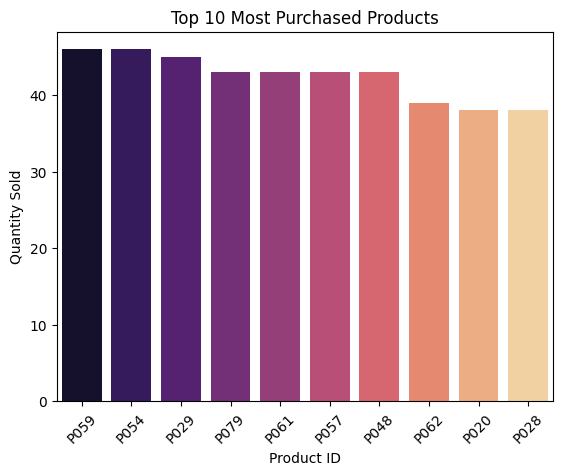

In [ ]:

print("\nMissing Values in t Dataset:")
print(t.isnull().sum())


print("\nDuplicate Rows in t Dataset:")
print(t.duplicated().sum())


print("\nSummary Statistics for t:")
print(t.describe())

total_revenue = t['TotalValue'].sum()
print(f"\nTotal Revenue: ${total_revenue:.2f}")


average_transaction_value = t['TotalValue'].mean()
print(f"Average Transaction Value: ${average_transaction_value:.2f}")


revenue_by_product = t.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)
print("\nTotal Revenue by Product:")
print(revenue_by_product)

sns.barplot(x=revenue_by_product.index[:10], y=revenue_by_product.values[:10], palette="plasma")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product ID")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

t['TransactionDate'] = pd.to_datetime(t['TransactionDate'])
t['Month'] = t['TransactionDate'].dt.month
monthly_sales = t.groupby('Month')['TotalValue'].sum()

print("\nMonthly Sales Trends:")
print(monthly_sales)
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()

most_purchased = t.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
print("\nMost Purchased Products:")
print(most_purchased)
sns.barplot(x=most_purchased.index[:10], y=most_purchased.values[:10], palette="magma")
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Product ID")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()



Total Revenue by Region:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


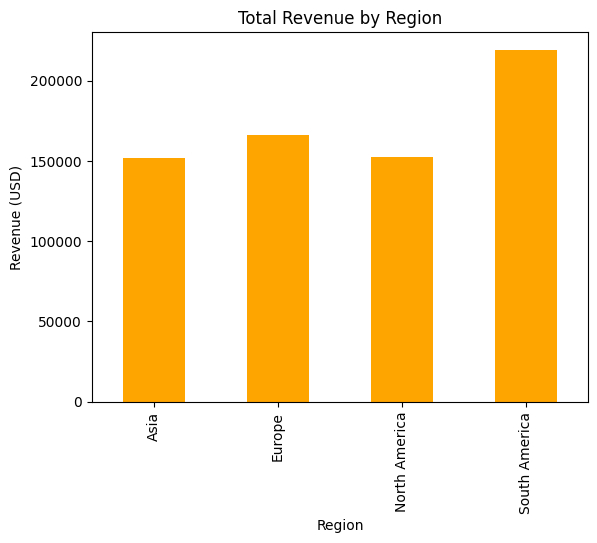


Average Spending per Customer: $3467.31


In [ ]:
customer_transactions = pd.merge(t,c, on='CustomerID', how='left')
region_revenue = customer_transactions.groupby('Region')['TotalValue'].sum()
print("\nTotal Revenue by Region:")
print(region_revenue)
region_revenue.plot(kind='bar', color='orange')
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue (USD)")
plt.show()
avg_spending_per_customer = customer_transactions.groupby('CustomerID')['TotalValue'].sum().mean()
print(f"\nAverage Spending per Customer: ${avg_spending_per_customer:.2f}")
